In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


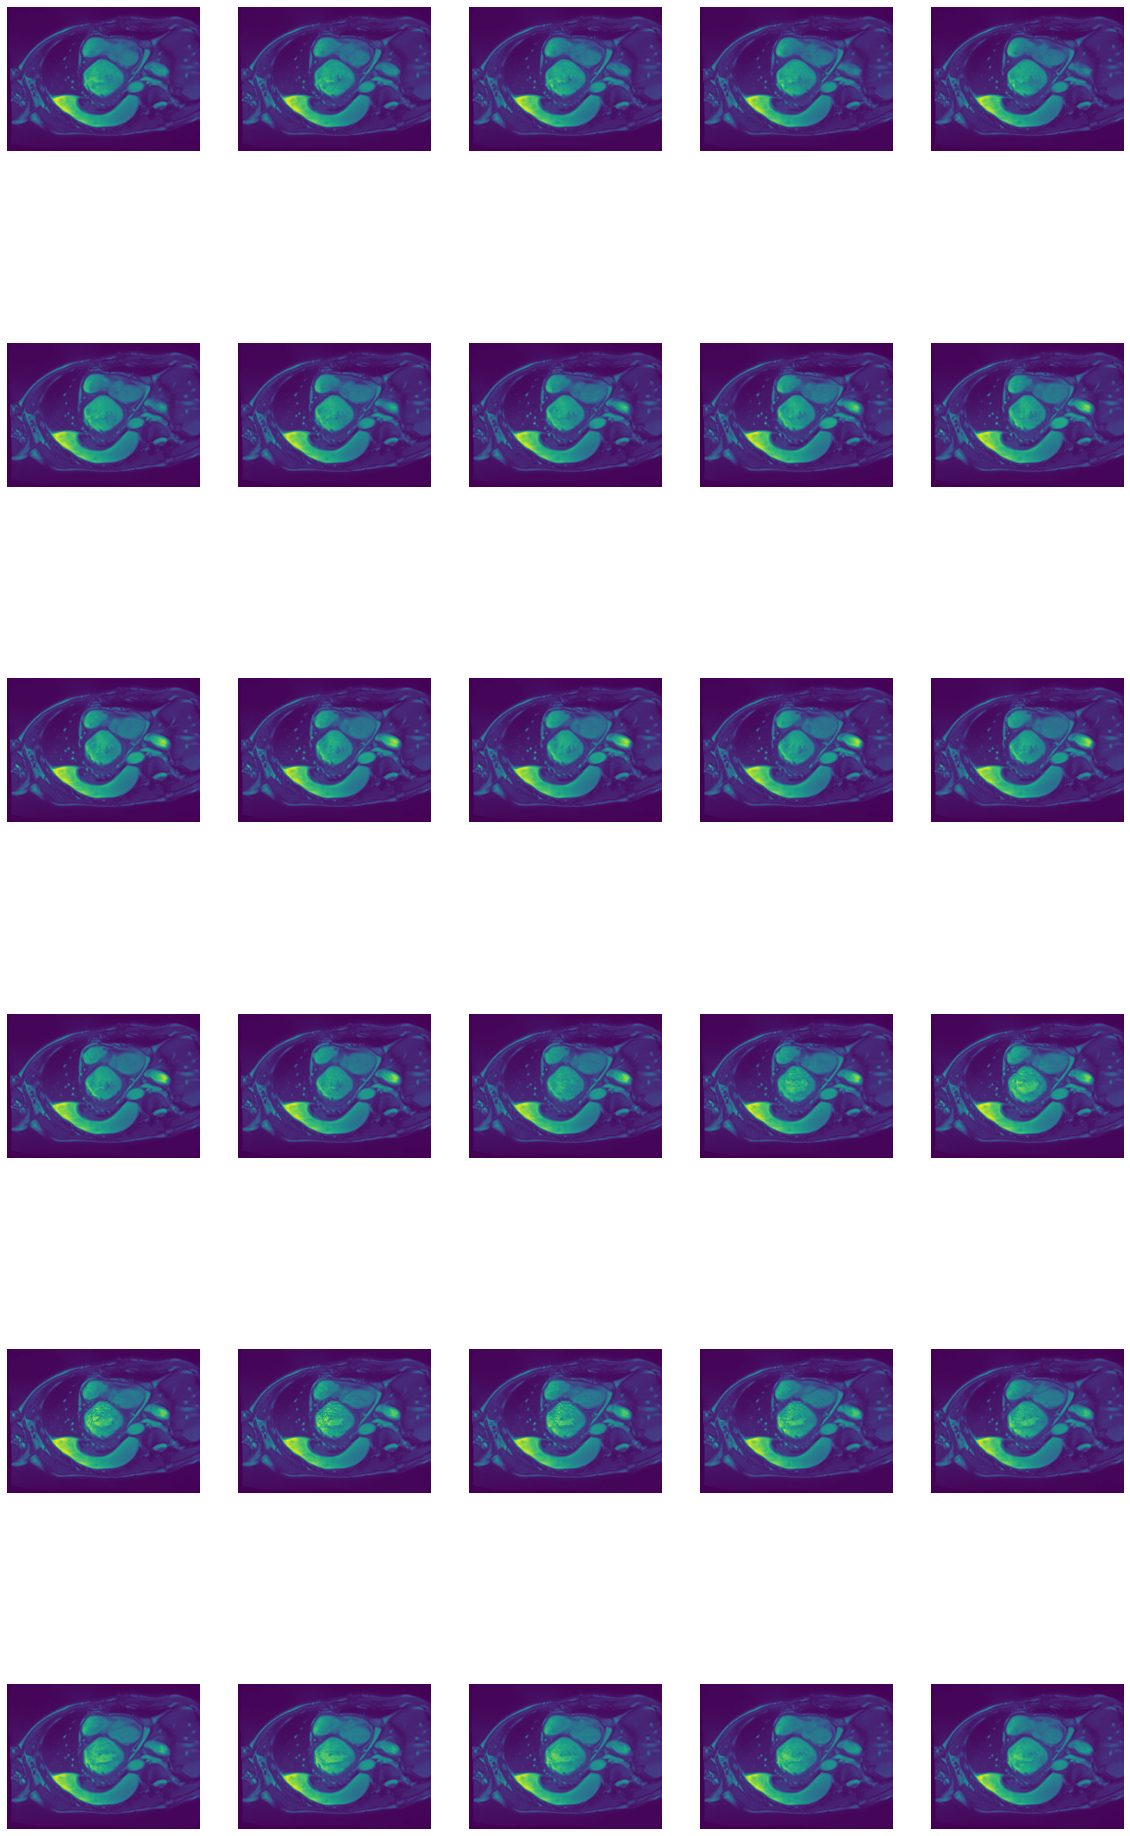

In [3]:
import matplotlib.pyplot as plt
# one of the image formats used for recording MRI images is the ".nii" format images. Functions required to read and process such files are 
# found in the module "nib" of python package "nibabel"
import nibabel as nib
img_4d_name = "/content/drive/My Drive/processed_acdc_dataset/dataset/train_set/patient016/patient016_4d.nii.gz"
# Load the 4D cardiac image sequence from the database. This is a sequence of around 30, 3D images each 3D image captured  
#at 30 different time instances of a cardiac cycle. Each 3-Dimensional image is made by stacking 8-10, 2-Dimensional cross section 
# slice images of the heart. 
nimg =nib.load((img_4d_name))
# nimg is an instance of "image" object. get_fdata() function loads 4D image into data4D
data4D=nimg.get_fdata()
# "nimg.header.get_zooms" function gives the patients pixel spacing between two pixels in the 4D image. That means the space between 
#these two pixels in the patients body. If we assume pixel spacing in the 4D image as 1mm the pixel spacing in the patient body is "pixel_spacing" mm 
pixel_spacing= nimg.header.get_zooms()
from skimage.feature import peak_local_max, canny
from skimage.transform import hough_circle 
import numpy as np
# radius of ventricle in patients body cant be lesser than this
minradius_mm=15
# radius of ventricle in patients body cant be greater than this
maxradius_mm=45
kernel_width=5
center_margin=8
num_peaks=10
num_circles=20
radstep=2
# inter pixel distance in mm ("pixel_spacing_X" is along horizontal x-axis, "pixel_spacing_y" is along vertical y-axis)  in patients 
#body assuming pixel distance in MRI image is 1mm 
pixel_spacing_X, pixel_spacing_Y, _,_ = pixel_spacing
#We know the length of the ventricle radius in patient's body. But what is the dimension of minimum ventricle radius in the cardiac MRI image ? 
minradius = int(minradius_mm / pixel_spacing_X)
maxradius = int(maxradius_mm / pixel_spacing_Y)
ximagesize = data4D.shape[0]
yimagesize = data4D.shape[1]
# no of 2D cross sectional slice images captured in each 3D image
zslices = data4D.shape[2]
# no of 3D images captured in a sequence during one cardiac cycle
tframes = data4D.shape[3]
xsurface = np.tile(range(ximagesize), (yimagesize, 1)).T
ysurface = np.tile(range(yimagesize), (ximagesize, 1))
lsurface = np.zeros((ximagesize, yimagesize))
# capture all (nearly 30 images each corresponding to 30 different time instances during a cardiac cycle) 2D images of cross sectional slice '0'.
# if we change '0' to '5' in data4D[:,:,0, t] we will get the all images belonging to the 5th cross sectional slice image 
ff1 = np.array([data4D[:,:,0, t] for t in range(tframes)])
# display all (around 30) cross sectional slice MRI images in row column format
f, axs = plt.subplots(6, 5, figsize=(20,36)) 
i=0
for x in axs.flatten(): 
   x.imshow(ff1[i,:,:]) ; x.axis('off') 
   i+=1


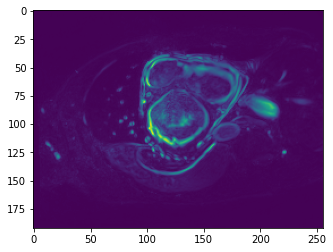

In [4]:
# compute standard deviation at each image pixel during the entire cardiac MRI cycle and display it 
fh = np.std(ff1, axis=0)
plt.imshow(fh)


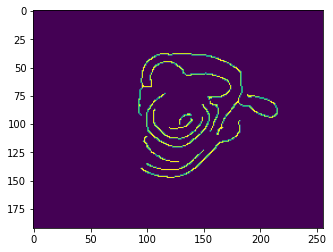

In [5]:
# compute the boundaries of this standard deviation image i.e the boundary of motion detected during the cardiac MRI cycle and display it
fh[fh < 0.1 * np.max(fh)] = 0.0
image = 1. * fh / np.max(fh)
        # find hough circles and detect two radii
edges = canny(image, sigma=3)
plt.imshow(edges)